# **Import Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# **Getting know data**

In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.shape

(214, 10)

# **Visualisation**

In [9]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

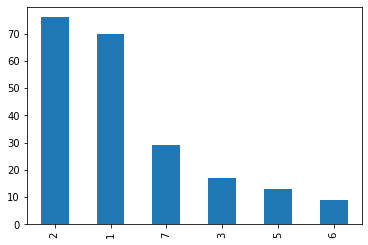

In [10]:
df['Type'].value_counts().plot.bar()
plt.show()

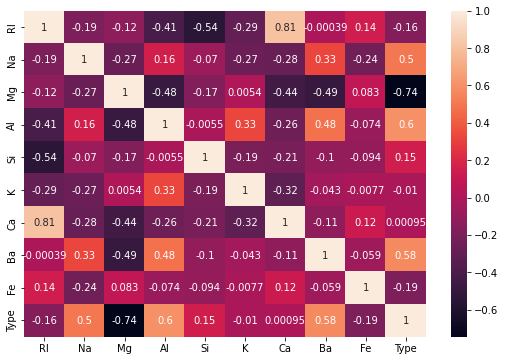

In [13]:
cor = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data = cor, annot = True)
plt.show()

# **Machine Learning**

In [14]:
X=df.drop('Type', axis=1)
Y=df['Type']

In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.33)

In [16]:
sc=StandardScaler()
sc.fit(X_train)

X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

# **Decision Tree**

In [21]:
def tree_model(X, Y, max_depth):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=42, test_size=0.33)
    
    dt=DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, Y_train)
    
    Y_tr_pred=dt.predict(X_train)
    Y_te_pred=dt.predict(X_test)
    
    train_score=accuracy_score(Y_train, Y_tr_pred)
    test_score=accuracy_score(Y_test, Y_te_pred)
    
    return train_score, test_score

In [22]:
train_scores, test_scores=[], []

In [23]:
for i in range(1, 21):
    res=tree_model(X, Y, i)
    
    train_scores.append(res[0])
    test_scores.append(res[1])

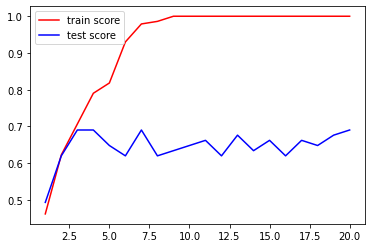

In [24]:
sns.lineplot(range(1, 21), train_scores, label='train score', color='red')
sns.lineplot(range(1, 21), test_scores, label='test score', color='blue')
plt.legend()
plt.show()

In [25]:
def model_building(algo, X_train, X_test, Y_train, Y_test):
    model=algo()
    model.fit(X_train, Y_train)
    
    Y_pred=model.predict(X_test)
    
    print(classification_report(Y_test, Y_pred))

In [26]:
models=[LogisticRegression, DecisionTreeClassifier]
for m in models:
    print(m)
    model_building(m, X_train, X_test, Y_train, Y_test)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
              precision    recall  f1-score   support

           1       0.65      0.68      0.67        22
           2       0.61      0.68      0.64        25
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.50      0.50      0.50         4
           7       0.77      1.00      0.87        10

    accuracy                           0.65        71
   macro avg       0.59      0.53      0.53        71
weighted avg       0.64      0.65      0.63        71

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
              precision    recall  f1-score   support

           1       0.63      0.55      0.59        22
           2       0.67      0.56      0.61        25
           3       0.43      0.75      0.55         4
           5       0.50      0.33      0.40         6
           6       0.67      1.00      0.80         4
           7     